# Projeto 2

Nome: Gabriela de Mesquita Sampaio Duarte
    
Nome: Gustavo de Lorenzi Cancellier Katz

Nome: Mariana de Camargo Salles Cezar

## Contextualização 

Pokémon é uma franquia de mídia que foi criada em 1995 centrada em criaturas ficcionais chamadas "Pokémon", onde seres humanos os capturam e os treinam para lutarem uns contra os outro como um esporte.

Os jogos originais de Pokémon são com elementos de estratégia divididos por gerações. Essas gerações são cronologicamente divididas pelo seu lançamento; a cada determinado número de anos contendo novos Pokémon, personagens e conceitos de jogabilidade, aquela sequência é considerada o começo de uma nova geração da franquia. 

O objetivo do jogo é capturar todas as espécies de Pokémon disponíveis na região fictícia onde o jogo está configurado e completar a informação de todos os Pokémon no Pokédex. Além disso, eles devem ser treinados para enfrentar outros Pokémon pertencentes a outros treinadores a fim de demonstrar suas habilidades, força e talento e assim se tornar um "Mestre Pokémon". Para conseguir isso, o treinador viaja por todas as regiões do mundo dos Pokémon, coletando "insígnias de ginásio", que são obtidas após derrotar os líderes de ginásio em uma batalha na qual tanto os pokemons dos treinadores quanto o dos líderes de ginásio se enfrentam para testar suas habilidades especiais em uma batalha Pokémon.

#### Dataset

O dataset utilizado no projeto contém a Pokédex  e apresenta as seguintes informações:

- "Abilities": habilidades
- Against Bug: contra lama   
- Against Dark: contra sombrio
- Against Dragon: contra dragão
- Against Electric: contra eletricidade
- Against Fairy: contra fada
- Against Fight: contra lutador
- Against Fire: contra fogo
- Against Flying: contra voador
- Against Ghost: contra fantasma
- Against Grass: contra grama
- Against Ground: contra 
- Against Ice: contra gelo
- Against Normal: contra normais
- Against Poison: contra veneno
- Against Psychic: contra
- Against Rock: contra pedra
- Against Steel: contra aço
- Against Water: contra água
- Attack: ataque
- Base Egg Steps: Quantos passos tem que dar para chocar o ovo
- Base Happiness: base de felicidade
- Base Total: base total
- Capture Rate: probabilidade de captura
- Classfication: classificação
- Defense: defesa 
- Experience Growth: taxa de experiência 
- Height M: altura macho 
- Hp: vida
- Japanese name: nome japones
- Name: nome
- Percentage male: porcentagem 
- Pokedex number: número na Pokedex
- Sp Attack: Ataque especial 
- Sp Defense: Defesa especial
- Speed: velocidade
- Type1: Tipo 1
- Type2: Tipo 2
- Weight kg: Peso em Kg
- Generation: geração
- Is legendary: é lendário?


Analisando essas informações seria possível observar padrões para prever o tipo 1(primário) dos pokémons. Dessa forma, os features serão as informações das colunas das relações da porcentagem de dano entre os tipos primários. 


Como o target do nosso projeto é uma variável qualitativa, será utilizado o método de **Classificadores**.

## Lendo o Dataset

#### Importando as bibliotecas necessárias

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pylab import rcParams

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report



# bibliotecas básicas para manipular qualquer modelo
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


# separador entre base de treino e de teste
from sklearn.model_selection import train_test_split

# ferramenta de normalização, essencial para o modelo
from sklearn.preprocessing import StandardScaler

# o modelo de classificação propriamente dito
from sklearn.neighbors import KNeighborsClassifier

# algumas funções para testar o modelo posteriormete:
# (explicadas no Turing Talks #11)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##### Verificando o diretório em que o arquivo está

In [150]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}! :)')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv! :)


#### Lendo o arquivo

In [151]:
df = pd.read_csv("pokemon.csv")
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


Pegando apenas os nomes das colunas:

In [79]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

Dentro do universo do Pokémon existem duas caracteríscas relevantes para os jogadores, sendo elas a distribuição de habilidades e como que cada tipo se caracteriza com os outros, portanto nossa análise sera voltada para esses dados.

## Preparação para a Análise 

Para começar fizemos o plot de relacionamentos entre pares de habilidades. Por padrão, esta função cria uma grade de eixos de forma que cada variável numérica seja compartilhada entre os eixos y em uma única linha e os eixos x em uma única coluna. Os gráficos diagonais são tratados de forma diferente: um gráfico de distribuição univariada é desenhado para mostrar a distribuição marginal dos dados em cada coluna.


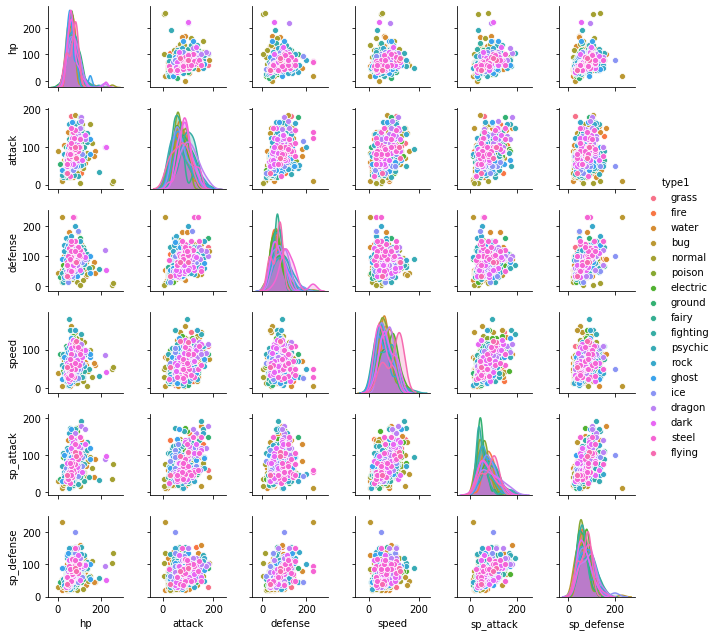

In [77]:
habilidades = df.loc[:, ['hp', 'attack', 'defense', 'speed', 'sp_attack', 'sp_defense', 'type1']]

sns.pairplot(habilidades, height=1.5, hue='type1');

Com isso podemos observar que os dados se comportam de forma semelhante, o que poderia ocasionar em uma perda de precisão ao tentar prever os tipos dos pokémons.

Em sequência, foi feito  o mesmo tipo de análise com as caracteríscas de comportamento entre os tipos, que foi dividida em 3 plotagens para facilitar a visualização e o tempo de plotagem

C:\Users\Gustavo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Gustavo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


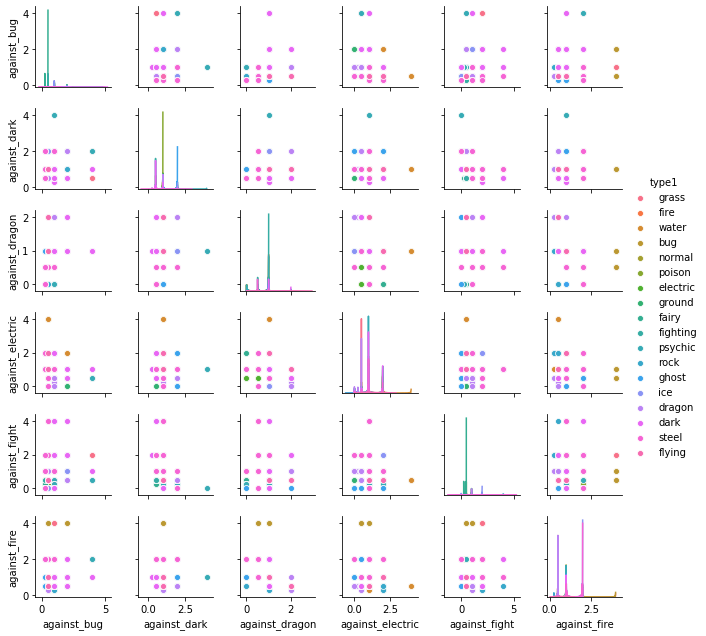

In [103]:
caracteristicas = df.loc[:, ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fight', 'against_fire', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');

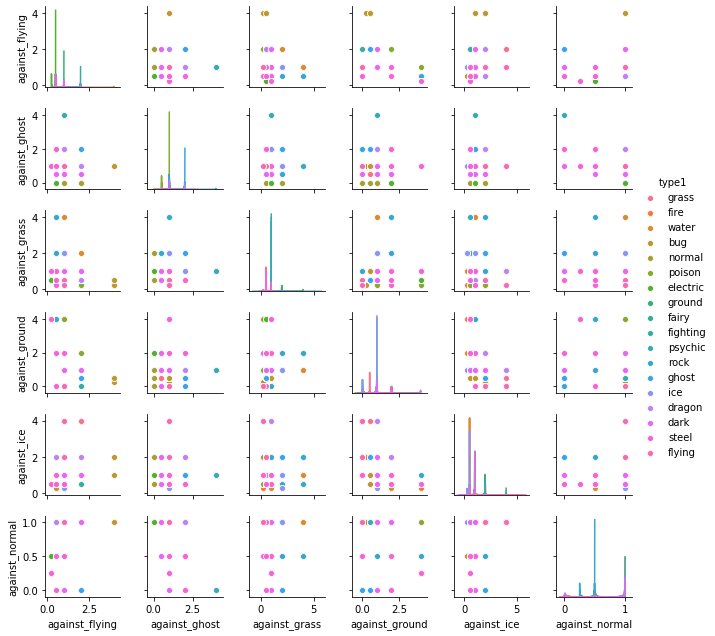

In [104]:
caracteristicas = df.loc[:, ['against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');

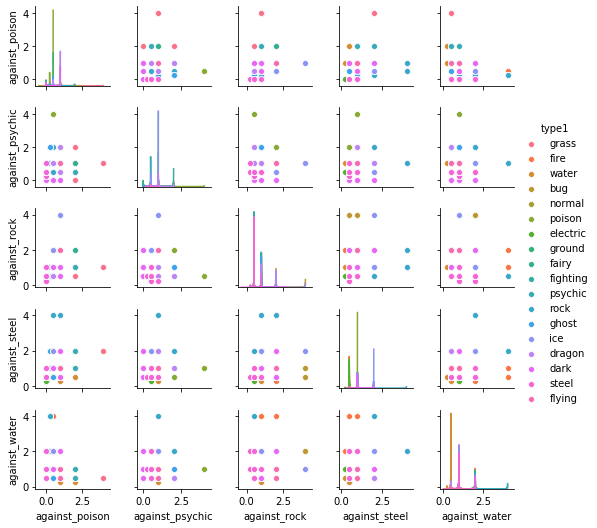

In [5]:
caracteristicas = df.loc[:, ['against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'type1']]
sns.pairplot(caracteristicas, height=1.5, hue='type1');

Difetentemente das habilidades, as caracteríscas mostram um comportamento distinto entre elas, o que favorece a previsão de dados. 

Então foi feito uma contagem dos Pokémons de cada tipo de maneira decrescente, que revela que alguns tipos de pokémon possuem mais amostras do que outros, por exemplo o tipo água, normal e de grama. Outros tipos, como o voador e o tipo fada, são mais raros no universo e por isso existem poucas amostras deles.

In [80]:
df.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

Este comando foi utilizado para observar as colunas incompletas. Estas não serão utilizadas para a predição, pois, caso o código as vejam como relevante quando elas estiverem faltando, há uma maior chance de erro, prejudicando a análise do modelo.

In [81]:
df.isnull().sum().sort_values(ascending = False)[:5] 

type2              384
percentage_male     98
height_m            20
weight_kg           20
is_legendary         0
dtype: int64

Com isso é possível escolher as colunas que serão usadas para prever o tipo 1 dos pokémons e implementar uma matriz para mostrar a correlação entre as colunas escolhidas. Quanto mais clara a cor, maior a correlação no cruzamento.

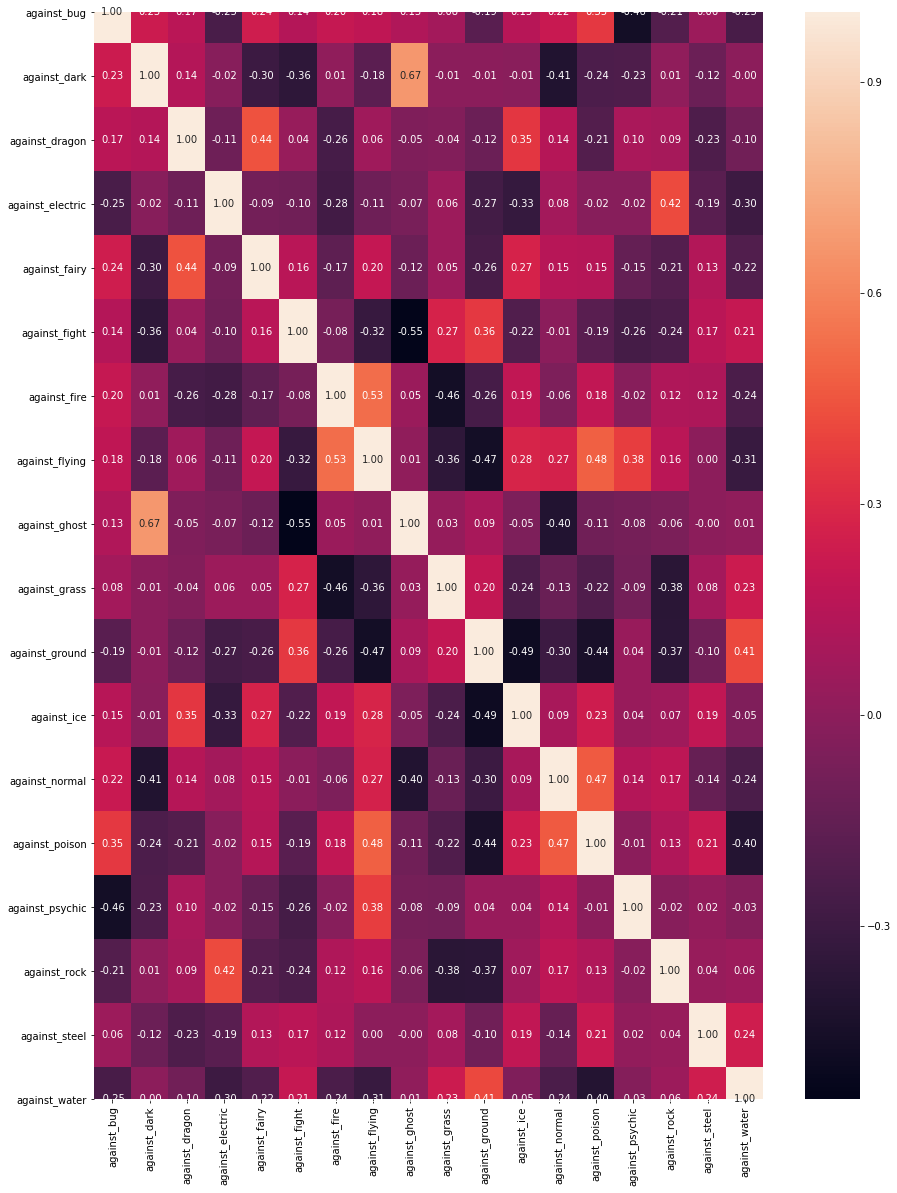

In [152]:
xlista = []
for i in range (1, 19):
    xlista.append(i)
x = df.iloc[:, xlista] # definimos a variável X

def plot_correlation(df):
    
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# load my data 
data  = df.iloc[:, xlista]

# plot correlation & densities
plot_correlation(data)

# Modelando Previsões

Inicia-se criando uma lista com as variáveis de características escolhidas dado a análise anterior "x" e escolhendo a variável que será prevista "y"

In [149]:
y = df.type1
print(x.head(1))
print(y.head(4))

   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   

   against_ground  against_ice  against_normal  against_poison  \
0             1.0          2.0             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water  
0              2.0           1.0            1.0            0.5  
0    grass
1    grass
2    grass
3     fire
Name: type1, dtype: object


#### Árvore de decisão

A árvore de decisão é um algoritmo para classificação e regressão com estrutura semelhante a uma árvore. Normalmente começa com um único nó, que se ramifica em outras possibilidades, de forma análoga à uma árvore genealógica.

Ele se baseia em separar os dados dos dataframes de acordo com as características comuns que as classes possuem e realiza diversas perguntas, que são respondidas de forma binária (com sim ou não) para todas as features do dataframe, sendo elas categóricas ou numéricas, e separando de acordo com as respostas. Esse processo é realizado até que o modelo probabilístico consiga tornar a amostra mais pura.


Para a classificação os Pokémons, iremos usar a função DecisionTreeClassifier da biblioteca sklean.

Pode-se observar como ela se comporta com a figura a baixo, suas ramificações estão reduzidas para facilitar a vizualização.

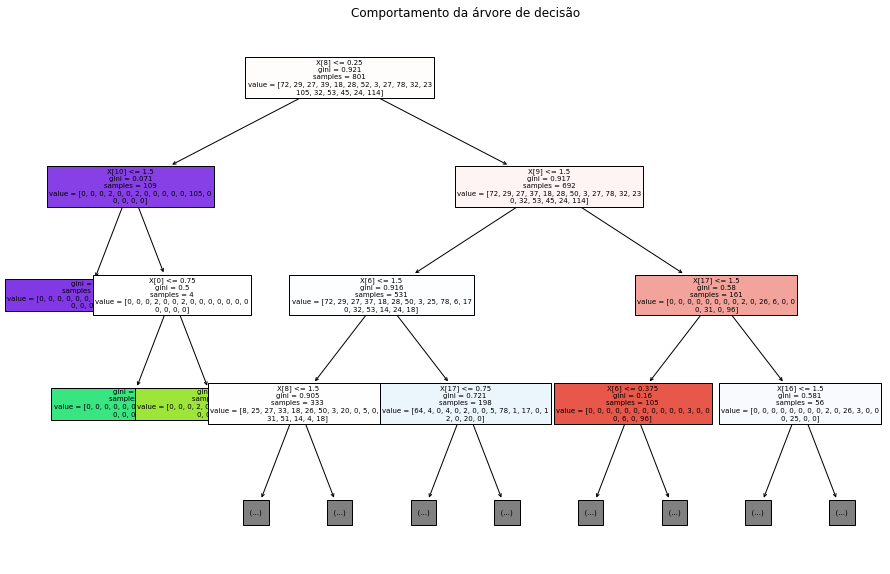

In [83]:
clf = x
iris = load_iris()
xclf, yclf = x, y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xclf, yclf)
plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled = True, max_depth = 3, fontsize = 7);
plt.title("Comportamento da árvore de decisão")
plt.show()

Para dividir os dados entre treino e teste, foi usado uma biblioteca do sklearn "train_test_split", pois ela nos permite dividir o treino e teste de forma proporcional com todos os tipos distribuídos tanto no treino como no teste.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [85]:
model1 = DecisionTreeClassifier () 
m = model1.fit(x_train, y_train)

Para calcular a acurácia do modelo é utilizado o comando score que retorna a acurácia média nos dados de teste e rótulos fornecidos.

In [86]:
resultado_train = m.score(x_train, y_train) 

print(f'Acurácia do modelo utilizado na planilha de treinamento: {resultado_train}')

acurácia do modelo utilizado na planilha de treinamento: 0.95625


In [87]:
resultado_test = m.score(x_test, y_test)

print(f'Acurácia do modelo utilizado na planilha de teste: {resultado_test}')

acurácia do modelo utilizado na planilha de teste: 0.9130434782608695


Ao escolher novas variáveis, a acurácia acaba mudando. Para sabermos se o modelo escolhido é adequado para o prever o que queremos, podemos rodar o código diversas vezes, obtendo assim a média, o mínimo e o máximo.

In [88]:
Resultados = []
soma = 0

In [89]:
for i in range (1, 51, 1):
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    
    
    model1 = DecisionTreeClassifier () 
    m = model1.fit(x_train, y_train)
        
    resultado_train = m.score(x_test, y_test)
    
    Resultados.append(resultado_train)
    
from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['Column_Name'])


In [90]:
print(df1.mean(), df1.min(), df1.max())


Column_Name    0.902857
dtype: float64 Column_Name    0.863354
dtype: float64 Column_Name    0.931677
dtype: float64


Uma forma de aprofundar a análise da previsão é com o "classification_report", que nos revela como a previsão se comporta em cada tipo, nos fornecendo precision, recall, f1-score e support.

In [91]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bug       0.93      0.76      0.84        17
        dark       1.00      1.00      1.00         4
      dragon       0.80      1.00      0.89         4
    electric       1.00      1.00      1.00         8
       fairy       1.00      1.00      1.00         2
    fighting       0.67      0.80      0.73         5
        fire       1.00      0.93      0.96        14
       ghost       0.80      1.00      0.89         4
       grass       1.00      1.00      1.00        19
      ground       1.00      0.62      0.77         8
         ice       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00        18
      poison       0.71      1.00      0.83         5
     psychic       1.00      0.93      0.96        14
        rock       0.69      1.00      0.82         9
       steel       0.80      0.80      0.80         5
       water       0.91      0.87      0.89        23

    accuracy              

   Matriz de confusão é uma tabela com um layout que permite uma melhor visualização do desempenho da predição feita pelo código. O nome é autoexplicativo, vendo a matriz de confusão é possível perceber se os resultados são confusos. Se na visualização há confusão entre os dois parâmetros comparados é fácil se confundir e interpretar uma dimensão como a outra ou vice versa. 

   As linhas na matriz representam os valores do próprio database, enquanto as colunas mostram os valores previstos pelo programa. As duas dimensões, base e prevista, possuem classes idênticas e na mesma ordem para o cruzamento das informações.
Da matriz de confusão abaixo, pode-se extrair a interpretação de que o programa tem uma boa previsão. as cores mais claras, que representam maior precisão, estão na diagonal principal.

   Esses valores correspondem aos acertos do modelo, ou seja, quando as dimensões se confundem. No caso apresentado, quando os pokémons sao corretamente classificados como pertencentes a uma classe específica. Os valores dessa matriz são valores absolutos, portanto iremos plotar uma tabela que apresente a porcentagem de acertos e erros de acordo com a classificação do modelo Decision Tree.

 
Matriz de Confusão: 
 [[13  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  2]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  5  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1 20]]


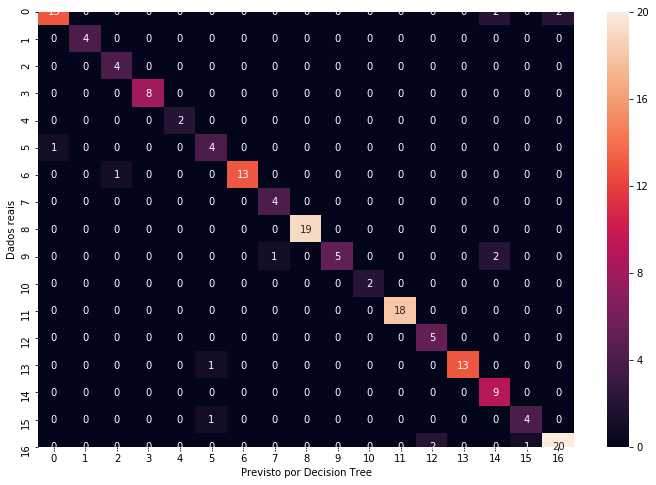

In [92]:
matriz_decision_tree = confusion_matrix(y_test, y_pred)
print(' ')
print ("Matriz de Confusão: \n", matriz_decision_tree)
# Para visualização:
plt.figure(figsize = (12, 8))
sns.heatmap(matriz_decision_tree, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Decision Tree')
plt.ylabel('Dados reais')
plt.show()
#  deixar a colorida

O comando usado abaixo, determinado “crosstab”, é um comando da biblioteca pandas com a função de construir uma tabela cruzada que apresenta a frequência com a qual uma classe específica aparece na base de dados. No caso apresentado, a tabela cruza as informações de frequência dos tipos primários na base de dados (colunas) com as dos tipos previstos (linhas). o resultado pode ser interpretado como a combinação de frequência cruzada na tabela.

A diagonal principal mostra o quão boa foi a classificação, uma vez que ela representa o cruzamento entre uma variável específica da base de dados com ela mesma na classificação.

In [93]:
pd.crosstab( y_pred, y_test, margins = True, normalize  = "index").round(2)*100

type1,bug,dark,dragon,electric,fairy,fighting,fire,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
row_0,,,,,,,,,,,,,,,,,
bug,93.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dark,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dragon,0.0,0.0,80.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
electric,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fairy,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fighting,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,17.0,0.0
fire,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Segundo modelo de previsão

Para evitar enviesamento na predição por discrepância de quantidade de pokémons de um único tipo, o StandardScaler está sendo utilizado. 
O StandardScaler executa a tarefa de padronização fazendo com que todas as features fiquem em uma mesma escala. Cada coluna vai ter média igual a 0 e desvio padrão igual a 1.

In [123]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

K-Nearest Neighbor é um classificador multi classes que olha para pontos intitulados perto de  um ponto sem título e faz uma previsão da classe que ele pode ser.

Uma das vantagens do K-nearest neighbor classification é sua velocidade em comparação a outros algorítimos de classificação, tanto que ele é considerado o algoritmo de aprendizagem mais simples e baseado em instância, sendo útil em casos de não linearidade.

In [153]:
# definindo o modelo
classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [130]:
resultado_test = classifier.score(x_test, y_test)
resultado_test 

0.7515527950310559

Assim como foi feito no modelo anterior, "classification_report" é utilizado para descrever como os resultados encontrados se comportam em relação a cada tipo primário.

In [131]:
KN = KNeighborsClassifier(n_neighbors=13, metric='euclidean')

KN.fit(x_train, y_train)

y_pred = KN.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bug       0.79      0.69      0.73        16
        dark       0.67      0.33      0.44         6
      dragon       0.25      1.00      0.40         1
    electric       0.33      0.25      0.29         4
       fairy       0.50      1.00      0.67         3
    fighting       0.83      1.00      0.91         5
        fire       0.92      0.75      0.83        16
       ghost       0.60      1.00      0.75         6
       grass       0.80      0.75      0.77        16
      ground       0.60      0.50      0.55         6
         ice       1.00      0.80      0.89         5
      normal       0.81      0.89      0.85        28
      poison       0.67      0.86      0.75         7
     psychic       1.00      0.91      0.95        11
        rock       0.77      0.77      0.77        13
       steel       0.25      1.00      0.40         1
       water       0.82      0.53      0.64        17

    accuracy              

Assim como  anteriormente, o modelo foi rodado 50 vezes com variáveis aleatórias, dessa forma foi possível ter sua média, mínimo e máximo, para poder concluir se o modelo KNeighborsClassifier é adequado para o tipo de problema.

In [156]:
Resultados = []
soma = 0

In [160]:
for i in range (1, 51, 1):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    x_train = sc_x.fit_transform(x_train)
    x_test = sc_x.transform(x_test)
    
    classifier = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
    classifier.fit(x_train, y_train)
    
    resultado_test = classifier.score(x_test, y_test)
    Resultados.append(resultado_test)


from pandas import DataFrame

df1 = DataFrame (Resultados,columns=['acurácia'])


In [161]:
print(df1.mean(), df1.min(), df1.max(), df1.std())

acurácia    0.771615
dtype: float64 acurácia    0.695652
dtype: float64 acurácia    0.857143
dtype: float64 acurácia    0.031571
dtype: float64


# Conclusão

Considerando nosso objetivo inicial de conseguir prever o tipo primario do pokémon a partir de algumas de suas caracteriscas, podemos considerar que obetivemos sucesso em ambos os modelos. 

A árvore de decisão se demonstrou eficiente ao classificar os 18 tipos de pokémon, chegando a obter uma acurácia de 95%. Isso significa que a maioria dos pokémons que nosso modelo classifica baseado nas características está correto, atingindo o objetivo inicial do projeto de prever o tipo primario de um pokémon aleatório. Um ponto chave para o sucesso do modelo foi a base de dados completa e extensa. Foi observado que as classes com mais amostras foram classificadas com maior acurácia, enquanto as classes com menor quantidade de amostras tiveram uma acurácia menor por falta de base para fazer a comparação. 
Os tipos primários do database com menos pokémons, como por exemplo o voador, que é uma classificação mais rara no universo, tiveram uma acurácia muito baixa, normalmente 0. Por outro lado, a classificação dos tipos primarios com mais integrantes, apresentou um maior desemprenho. Isso pode ser observado no tipo água em que sua acurácia média foi de aproximadamente de 1.

O segundo modelo de previsão utilizado foi o KNeighborsClassifier e ele também apresentou um bom desempenho ao determinar o tipo primário de um pokémon a partir das caracteisticas analisadas. Porém sua performance não teria sido tão eficaz sozinho, foi utilizado uma junção de métodos para aumentar a acurácia do modelo. A função StandardScaler da biblioteca sklearn ajudou a garantir que não houvesse enviezamento na predição, refinando assim o modelo e permitindo o desempenho obtido. A acurácia média foi de aproximadamente 77%, ou seja, a cada 100 pokémons classificados em um tipo primário, 77 eram corretamente previstos.

Como ultimas considerações podemos comentar sobre a eficácia de cada modelo perante a pergunta inicial. O primeiro modelo tem a acurácia média de 90%, enquanto o segundo tem de apenas 77%. Isso não significa que o segundo modelo seja ruim, mas demonstra a alta eficácia da árvore de precisão que, para o contexto estudado, apresentou maior desempenho em classificar os pokémons. Ambos os modelos têm resultado positivo para o que era esperado nesse projeto. Portanto podemos considerar que atingimos o objetivo de prever o tipo primário de um pokémon a partir de suas características com os dois modelos.

Referências utilizadas: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001773&gclid=CjwKCAjwqvyFBhB7EiwAER786Qy8DzoS3yVVya-G6fSHm8CqrI1l6chETWa6agAjspaEqB1wuboCfRoCxUkQAvD_BwE

https://scikit-learn.org/stable/modules/neighbors.html

https://scikit-learn.org/stable/modules/tree.html#classification

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

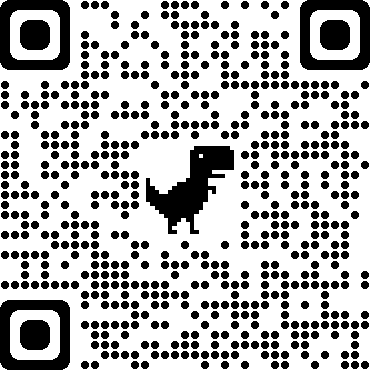